# Preparing the Data
##### Author: E. Thompson-Becker

- Missing Values \\
- Normalize data  
- Some initial analysis
- Create train and test sets 


In [2]:
#import packages
import csv
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import matplotlib as mpl
from datetime import datetime 
from statsmodels.tsa.seasonal import seasonal_decompose
import datetime

In [4]:
#load original dataset
data = pd.read_csv("PRSA_Data_Shunyi_20130301-20170228.csv")

In [5]:
#rename column PM2.5 to PM25 to be able to work with it better
data.rename(columns={"PM2.5":"PM25"}, inplace=True)

#look at the dataset
data

,No,year,month,day,hour,PM25,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,3.0,6.0,3.0,8.0,300.0,44.0,-0.9,1025.8,-20.5,0.0,NW,9.3,Shunyi
1,2,2013,3,1,1,12.0,12.0,3.0,7.0,300.0,47.0,-1.1,1026.1,-21.3,0.0,NW,9.4,Shunyi
2,3,2013,3,1,2,14.0,14.0,NaN,7.0,200.0,22.0,-1.7,1026.2,-23.0,0.0,NW,8.6,Shunyi
3,4,2013,3,1,3,12.0,12.0,3.0,5.0,NaN,NaN,-2.1,1027.3,-23.3,0.0,NW,6.6,Shunyi
4,5,2013,3,1,4,12.0,12.0,3.0,NaN,200.0,11.0,-2.4,1027.7,-22.9,0.0,NW,4.5,Shunyi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,35060,2017,2,28,19,27.0,72.0,8.0,92.0,800.0,16.0,10.3,1014.2,-12.4,0.0,W,1.8,Shunyi
35060,35061,2017,2,28,20,47.0,55.0,17.0,86.0,1100.0,19.0,9.8,1014.5,-9.9,0.0,NW,1.5,Shunyi
35061,35062,2017,2,28,21,18.0,28.0,4.0,30.0,500.0,64.0,9.1,1014.6,-12.7,0.0,NE,1.7,Shunyi
35062,35063,2017,2,28,22,18.0,20.0,9.0,33.0,500.0,59.0,7.1,1015.2,-13.2,0.0,WNW,1.8,Shunyi


In [6]:
#remove columns 1 & 18
data.pop("No")
data.pop("station")

0        Shunyi
1        Shunyi
2        Shunyi
3        Shunyi
4        Shunyi
          ...  
35059    Shunyi
35060    Shunyi
35061    Shunyi
35062    Shunyi
35063    Shunyi
Name: station, Length: 35064, dtype: object

## Deal with Missing Values 

In [7]:
#check the null values in each column 
data.isnull().sum()

#check total number of missing values in the entrire data set
data.isnull().sum().sum()

8523

In [8]:
#fill the missing values with the value directly before
data_full = data.fillna(method="ffill")

#check again the total number of missing values in the dataset
#there should be none left 
data_full.isnull().sum().sum()

0

In [ ]:
#save the full data set to a csv file 
#download normalized altered file
data_full.to_csv('Shunyi-data.csv')

from google.colab import files
files.download("Shunyi-data.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Normalize the data

In [9]:
#drop wd column to be able to normalize it 
data_norm = data_full.drop(columns="wd")

#define columns to normalize 
x = data_norm.iloc[:,4:15]
#normalize values in last 11 rows
#excluding the time data
data_norm.iloc[:,4:16] = (x-x.min())/(x.max()-x.min())
#check the normalized data set
data_norm

,year,month,day,hour,PM25,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
0,2013,3,1,0,0.001065,0.004012,0.011371,0.023438,0.020202,0.124568,0.277003,0.689781,0.244094,0.0,0.726562
1,2013,3,1,1,0.010650,0.010030,0.011371,0.019531,0.020202,0.133102,0.273519,0.695255,0.231496,0.0,0.734375
2,2013,3,1,2,0.012780,0.012036,0.011371,0.019531,0.010101,0.061979,0.263066,0.697080,0.204724,0.0,0.671875
3,2013,3,1,3,0.010650,0.010030,0.011371,0.011719,0.010101,0.061979,0.256098,0.717153,0.200000,0.0,0.515625
4,2013,3,1,4,0.010650,0.010030,0.011371,0.011719,0.010101,0.030685,0.250871,0.724453,0.206299,0.0,0.351562
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,2017,2,28,19,0.026624,0.070211,0.032316,0.351562,0.070707,0.044910,0.472125,0.478102,0.371654,0.0,0.140625
35060,2017,2,28,20,0.047923,0.053159,0.070018,0.328125,0.101010,0.053444,0.463415,0.483577,0.411024,0.0,0.117188
35061,2017,2,28,21,0.017039,0.026078,0.015560,0.109375,0.040404,0.181466,0.451220,0.485401,0.366929,0.0,0.132812
35062,2017,2,28,22,0.017039,0.018054,0.036506,0.121094,0.040404,0.167242,0.416376,0.496350,0.359055,0.0,0.140625


In [10]:
#save the normalized data set to a csv file 
#download normalized altered file
data_norm.to_csv('Shunyi_norm_data.csv')

from google.colab import files
files.download("Shunyi_norm_data.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Preform Initial Analysis

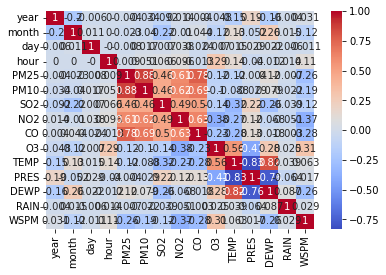

In [ ]:
# calculating a correlation matrix
matrix = data_norm.corr().round(3)
#print(matrix)

#print correlation matrix as a headmap 
sb.heatmap(matrix, annot=True, cmap="coolwarm")
plt.show()

Text(0.5, 1.0, 'Month-wise Box Plot\n(The Seasonality)')

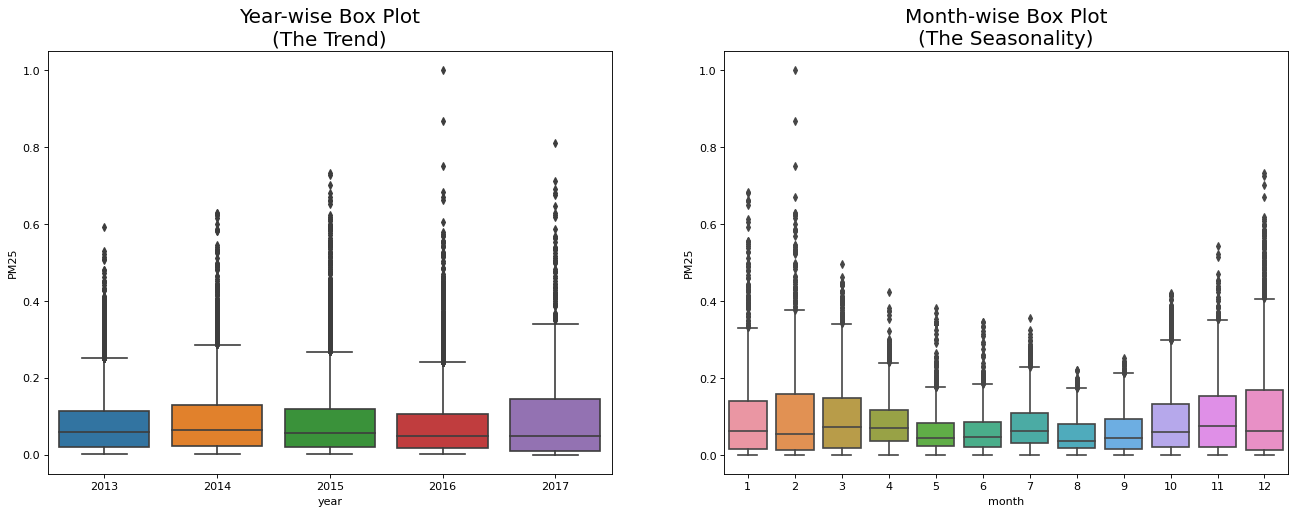

In [11]:
#Seasonal Boxplot for dependent variable PM2.5
#prep data
years = data_norm['year'].unique()

#prep colours
np.random.seed(100)
mycols = np.random.choice(list(mpl.colors.XKCD_COLORS.keys()), len(years), replace=False)

#create boxplots by year and month 
fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
sb.boxplot(x='year', y='PM25', data=data_norm, ax=axes[0])
sb.boxplot(x='month', y='PM25', data=data_norm.loc[~data_norm.year.isin([2013, 2017]), :])

# Set Title
axes[0].set_title('Year-wise Box Plot\n(The Trend)', fontsize=18); 
axes[1].set_title('Month-wise Box Plot\n(The Seasonality)', fontsize=18)

In [ ]:
#create a new column combining day month year
cols = ["year","month","day"]
data_norm['date'] = data_norm[cols].apply(lambda x:'-'.join(x.values.astype(str)), axis="columns")
#convert date to datetime type
data_norm['date']=pd.to_datetime(data_norm['date'])

#move date column to front of data set and remove the 3 variables 
data_norm.pop("year")
data_norm.pop("month")
data_norm.pop("day")
col = data_norm.pop("date")

#insert date to from of data set
data_norm.insert(0,col.name, col)




In [14]:
#check data types after changing year/month/day to datetime form 
data_norm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    35064 non-null  datetime64[ns]
 1   hour    35064 non-null  int64         
 2   PM25    35064 non-null  float64       
 3   PM10    35064 non-null  float64       
 4   SO2     35064 non-null  float64       
 5   NO2     35064 non-null  float64       
 6   CO      35064 non-null  float64       
 7   O3      35064 non-null  float64       
 8   TEMP    35064 non-null  float64       
 9   PRES    35064 non-null  float64       
 10  DEWP    35064 non-null  float64       
 11  RAIN    35064 non-null  float64       
 12  WSPM    35064 non-null  float64       
dtypes: datetime64[ns](1), float64(11), int64(1)
memory usage: 3.5 MB


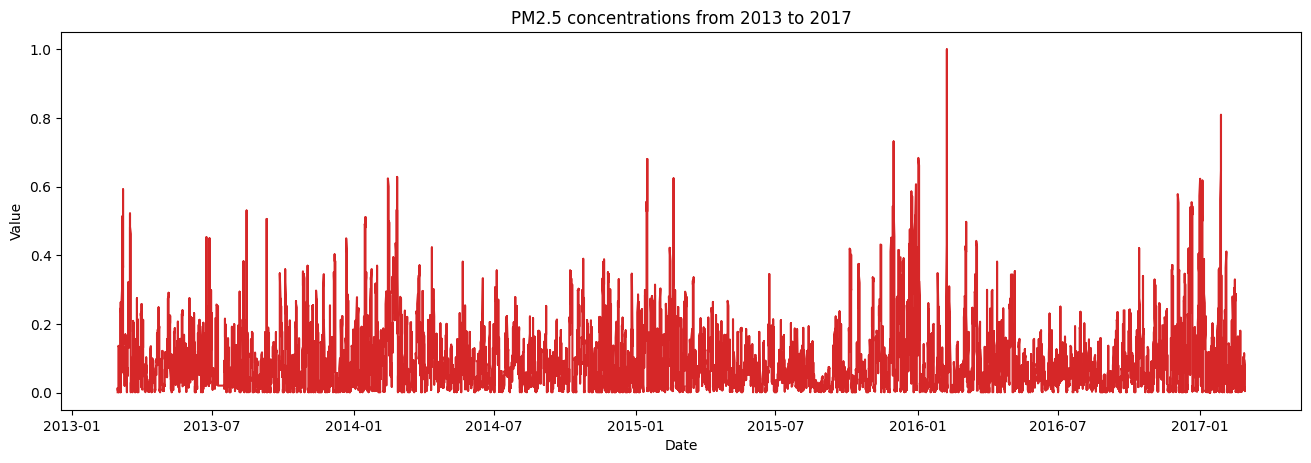

In [ ]:
# Draw Plot for PM2.5 over the years
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Value', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(data_norm, x=data_norm.date, y=data_norm.PM25, title='PM2.5 concentrations from 2013 to 2017')

## Cross Validation 
Since cross validation is being used and the data being a time series, we will use sklearn TimeSeriesSplit to find where the data should be separated into test and train. 

In [15]:
from sklearn.model_selection import TimeSeriesSplit
#Specify fold and perform splitting
tscv = TimeSeriesSplit(n_splits=11)  #test on 3 months at a time 
tscv.split(data_norm)

#Find out no of observations in train and test sets
i=0
for train, test in tscv.split(data):
    i=i+1
    print ("No of observations under train%s=%s" % (i, len(train)))
    print ("No of observations under test%s=%s" % (i, len(test)))

No of observations under train1=2922
No of observations under test1=2922
No of observations under train2=5844
No of observations under test2=2922
No of observations under train3=8766
No of observations under test3=2922
No of observations under train4=11688
No of observations under test4=2922
No of observations under train5=14610
No of observations under test5=2922
No of observations under train6=17532
No of observations under test6=2922
No of observations under train7=20454
No of observations under test7=2922
No of observations under train8=23376
No of observations under test8=2922
No of observations under train9=26298
No of observations under test9=2922
No of observations under train10=29220
No of observations under test10=2922
No of observations under train11=32142
No of observations under test11=2922


In [16]:
#Splitting according to the above description
train1, test1 = data.iloc[:2922, 0], data.iloc[2922:5844, 0]
train2, test2 = data.iloc[:5844, 0], data.iloc[5844:8766, 0]
train3, test3 = data.iloc[:8766, 0], data.iloc[8766:11688, 0]
train4, test4 = data.iloc[:11688, 0], data.iloc[11688:14610, 0]
train5, test5 = data.iloc[:14610, 0], data.iloc[14610:17532, 0]
train6, test6 = data.iloc[:17532, 0], data.iloc[17532:20454, 0]
train7, test7 = data.iloc[:20454, 0], data.iloc[20454:23376, 0]
train8, test8 = data.iloc[:23376, 0], data.iloc[23376:26298, 0]
train9, test9 = data.iloc[:26298, 0], data.iloc[26298:29220, 0]
train10, test10 = data.iloc[:29220, 0], data.iloc[29220:32142, 0]
train11, test11 = data.iloc[:32142, 0], data.iloc[32142:35063, 0]


#https://www.datasciencesmachinelearning.com/2018/12/time-series-cross-validation-and.html website


In [ ]:
#download normalized altered file
data_norm.to_csv('Shunyi-data_norm.csv')

from google.colab import files
files.download("Shunyi-data_norm.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [17]:
#spearate the data into each month

data[0:744] #03/2013
data[745:1464] #04/2013
data[1464:2208] #05/20123
data[2209:2928] #06/2013
data[2929:3671] #07/2013
data[3672:4415]  #08/2013
data[4416:5136] #09/2013
data[5137:5880] #10/2013
data[5881:6599] #11/2013
data[6599:7343] #12/2013

data[7344:8087]  #01/2014
data[8088:8760] #02/2014
data[8760:9504] #03/2014
data[9504:10224] #04/2014
data[10224:10968] #05/2014
data[10968:11688] #06/2014
data[11688:12432] #07/2014
data[12432:13176] #08/2014
data[13176:13896] #09/2014
data[13896:14640] #10/2014
data[14640:15360] #11/2014
data[15360:16104] #12/2014

data[16104:16848] #01/2015
data[16848:17520] #02/2015
data[17520:18264] #03/2015
data[18264:18984] #04/2015
data[18984:19728] #05/2015
data[19728:20448] #06/2015
data[20448:21192] #07/2015
data[21192:21936] #08/2015
data[21936:22656] #09/2015
data[22656:23400] #10/2015
data[23400:24120] #11/2015
data[24120:24864] #12/2015

data[24864:25608] #01/2016
data[25608:26304] #02/2016
data[26304:27048] #03/2016
data[27048:27768] #04/2016
data[27768:28512] #05/2016
data[28512:29232] #06/2016
data[29232:29976] #07/2016
data[29976:30720] #08/2016
data[30720:31440] #09/2016
data[31440:32184] #10/2016
data[32184:32904] #11/2016
data[32904:33648] #12/2016

data[33648:34392] #01/2017
data[34392:35064] #02/2017

,year,month,day,hour,PM25,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM
34392,2017,2,1,0,14.0,27.0,7.0,12.0,500.0,68.0,-4.1,1030.4,-19.5,0.0,WNW,0.8
34393,2017,2,1,1,10.0,22.0,3.0,10.0,400.0,68.0,-3.6,1031.1,-19.9,0.0,NNE,1.5
34394,2017,2,1,2,4.0,19.0,2.0,10.0,300.0,65.0,-4.7,1031.9,-19.7,0.0,NNE,0.9
34395,2017,2,1,3,7.0,19.0,3.0,10.0,500.0,65.0,-5.8,1032.6,-18.8,0.0,NNE,1.3
34396,2017,2,1,4,6.0,19.0,7.0,8.0,500.0,67.0,-5.6,1033.3,-18.7,0.0,NE,1.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,2017,2,28,19,27.0,72.0,8.0,92.0,800.0,16.0,10.3,1014.2,-12.4,0.0,W,1.8
35060,2017,2,28,20,47.0,55.0,17.0,86.0,1100.0,19.0,9.8,1014.5,-9.9,0.0,NW,1.5
35061,2017,2,28,21,18.0,28.0,4.0,30.0,500.0,64.0,9.1,1014.6,-12.7,0.0,NE,1.7
35062,2017,2,28,22,18.0,20.0,9.0,33.0,500.0,59.0,7.1,1015.2,-13.2,0.0,WNW,1.8
